<a href="https://colab.research.google.com/github/Jin4041/BOJ/blob/main/multiclasssClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import reuters

(train_data,train_labels),(test_data,test_labels)=reuters.load_data(num_words=10000)

2110848/2110848 [==============================] - 0s 0us/step


In [ ]:
len(train_data)
len(test_data)
train_data[10]

2246

In [ ]:
word_index=reuters.get_word_index()
reverse_word_index=dict(
    [(value,key) for (key,value) in word_index.items()])
decoded_newswire=" ".join(
    [reverse_word_index.get(i-3,"?") for i in train_data[0]])

In [ ]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results=np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    for j in sequence:
      results[i,j]=1.
  return results

x_train=vectorize_sequences(train_data)
x_test=vectorize_sequences(test_data)

In [ ]:
def to_one_hot(labels,dimension=46):
  results=np.zeros((len(labels),dimension))
  for i,label in enumerate(labels):
    results[i,label]=1.
  return results

y_train=to_one_hot(train_labels)
y_test=to_one_hot(test_labe)

In [ ]:
from keras.utils.np_utils import to_categorical
y_train=to_categorical(train_labels)
y_test=to_categorical(test_labels)

ModuleNotFoundError: No module named 'keras.utils.np_utils'

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model=keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

In [ ]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
x_val=x_train[:1000]
partial_x_train=x_train[1000:]
y_val=y_train[:1000]
partial_y_train=y_train[1000:]

In [ ]:
history=model.fit(partial_x_train,
                  partial_y_train,
                  epochs=20,
                  batch_size=512,
                  validation_data=(x_val,y_val))

Epoch 1/20
16/16 [==============================] - 2s 85ms/step - loss: 2.7521 - accuracy: 0.5155 - val_loss: 1.8989 - val_accuracy: 0.6160
Epoch 2/20
16/16 [==============================] - 1s 55ms/step - loss: 1.5799 - accuracy: 0.6779 - val_loss: 1.4072 - val_accuracy: 0.6950
Epoch 3/20
16/16 [==============================] - 1s 56ms/step - loss: 1.1944 - accuracy: 0.7390 - val_loss: 1.1892 - val_accuracy: 0.7460
Epoch 4/20
16/16 [==============================] - 1s 57ms/step - loss: 0.9739 - accuracy: 0.7902 - val_loss: 1.0808 - val_accuracy: 0.7780
Epoch 5/20
16/16 [==============================] - 1s 55ms/step - loss: 0.8098 - accuracy: 0.8242 - val_loss: 1.0291 - val_accuracy: 0.7730
Epoch 6/20
16/16 [==============================] - 1s 57ms/step - loss: 0.6834 - accuracy: 0.8503 - val_loss: 0.9868 - val_accuracy: 0.7890
Epoch 7/20
16/16 [==============================] - 1s 87ms/step - loss: 0.5757 - accuracy: 0.8786 - val_loss: 0.9212 - val_accuracy: 0.8020
Epoch 8/20
16

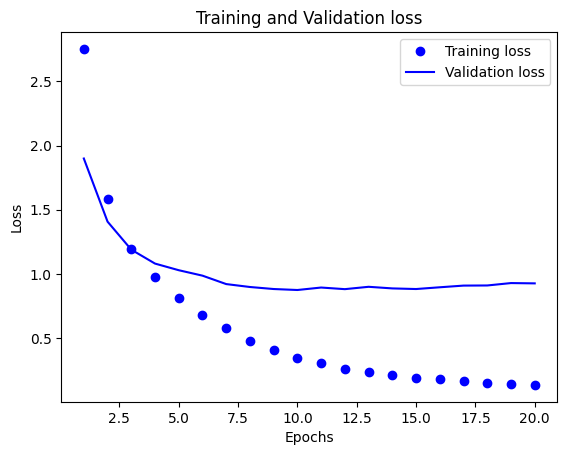

In [ ]:
import matplotlib.pyplot as plt
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(loss)+1)

plt.plot(epochs,loss, 'bo', label='Training loss')
plt.plot(epochs,val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

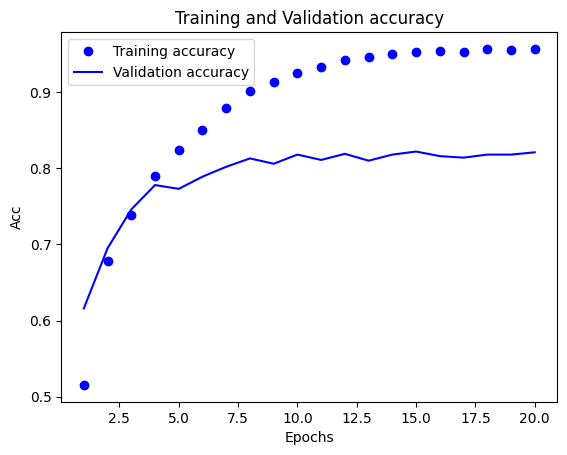

In [ ]:
plt.clf()
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

plt.plot(epochs,acc, 'bo', label='Training accuracy')
plt.plot(epochs,val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

In [ ]:
model=keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)
results=model.evaluate(x_test,y_test)
results

Epoch 1/9
18/18 [==============================] - 2s 53ms/step - loss: 2.5679 - accuracy: 0.5122
Epoch 2/9
18/18 [==============================] - 1s 46ms/step - loss: 1.4226 - accuracy: 0.6959
Epoch 3/9
18/18 [==============================] - 1s 53ms/step - loss: 1.0982 - accuracy: 0.7655
Epoch 4/9
18/18 [==============================] - 1s 42ms/step - loss: 0.8955 - accuracy: 0.8092
Epoch 5/9
18/18 [==============================] - 1s 41ms/step - loss: 0.7368 - accuracy: 0.8387
Epoch 6/9
18/18 [==============================] - 1s 43ms/step - loss: 0.6153 - accuracy: 0.8652
Epoch 7/9
18/18 [==============================] - 1s 49ms/step - loss: 0.5070 - accuracy: 0.8916
Epoch 8/9
18/18 [==============================] - 1s 50ms/step - loss: 0.4300 - accuracy: 0.9074
Epoch 9/9
71/71 [==============================] - 1s 5ms/step - loss: 0.9259 - accuracy: 0.7965


[0.9259452819824219, 0.7965271472930908]

In [ ]:
import copy
test_labels_copy=copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
history_array=np.array(test_labels)==np.array(test_labels_copy)
history_array.mean()

0.18744434550311664

In [ ]:
predictions=model.predict(x_test)
predictions[0].shape

71/71 [==============================] - 0s 3ms/step


(46,)

In [ ]:
model=keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=128)
results=model.evaluate(x_test,y_test)
results

Epoch 1/9
63/63 [==============================] - 3s 27ms/step - loss: 2.7147 - accuracy: 0.3854
Epoch 2/9
63/63 [==============================] - 1s 15ms/step - loss: 1.6431 - accuracy: 0.6146
Epoch 3/9
63/63 [==============================] - 1s 14ms/step - loss: 1.3136 - accuracy: 0.6758
Epoch 4/9
63/63 [==============================] - 1s 14ms/step - loss: 1.1605 - accuracy: 0.7085
Epoch 5/9
63/63 [==============================] - 1s 14ms/step - loss: 1.0518 - accuracy: 0.7345
Epoch 6/9
63/63 [==============================] - 1s 16ms/step - loss: 0.9670 - accuracy: 0.7496
Epoch 7/9
63/63 [==============================] - 1s 15ms/step - loss: 0.8912 - accuracy: 0.7640
Epoch 8/9
63/63 [==============================] - 1s 14ms/step - loss: 0.8271 - accuracy: 0.7828
Epoch 9/9
71/71 [==============================] - 0s 3ms/step - loss: 1.2754 - accuracy: 0.7061


[1.2754497528076172, 0.7061442732810974]